# Task 1:Spam SMS Classifier
by Madamala Rohith Eswara Sai Srinivas

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
text_messages = pd.read_csv('spam (1).csv', encoding='ISO-8859-1', usecols=['v1', 'v2'])

In [4]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

text_messages['v2'] = text_messages['v2'].apply(preprocess_text)

In [5]:
cv = CountVectorizer(max_features=3000)
X = cv.fit_transform(text_messages['v2']).toarray()

In [6]:
y = pd.get_dummies(text_messages['v1'])
y = y.iloc[:, 1].values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [8]:
spam_detection_model = MultinomialNB().fit(X_train, y_train)

In [9]:
y_pred = spam_detection_model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9865470852017937
F1 Score: 0.9865638647203537


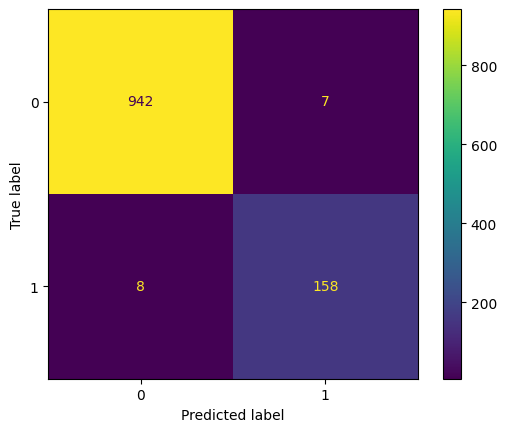

In [10]:
labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [11]:
new_messages = ['Get a free cruise now!', 'Hey, can you pick up some milk on your way home?']
new_messages = [preprocess_text(msg) for msg in new_messages]
new_messages = cv.transform(new_messages)
predictions1 = spam_detection_model.predict(new_messages)
for i in predictions1:
    if i:
        print("spam message")
    else:
        print("ham message")

spam message
ham message


In [14]:
df = pd.read_csv('spam_test.csv',usecols=['text'])
new_messages = [preprocess_text(msg) for msg in df['text']]
new_messages = cv.transform(new_messages)
predictions = spam_detection_model.predict(new_messages)
df['Spam message']=predictions
df['Spam message']=df['Spam message'].replace(1,True)
df['Spam message']=df['Spam message'].replace(0,False)
display(df.head(10))

,text,Spam message
0,CREDITED: Rs.75 wallet money. Use it to order ...,True
1,"Shoe styles paired with minimal looks, perfect...",True
2,"Kejani Cleaning Services offers comprehensive,...",False
3,Carrefour Fridays month is on!! Crazy deals ev...,False
4,Keep up with MTN Broadband! Visit https://apps...,True
5,Get clientele HELP Cover today. Debi check and...,True
6,Do you like your friend's signature? Reply wit...,True
7,Get 2.5GB + 100 Telkom Mins +2 Bob/ Min to oth...,True
8,Enjoy more talktime when you recharge your Air...,True
9,25% Discount - Get Ultra 50GB from MyTelenor A...,True


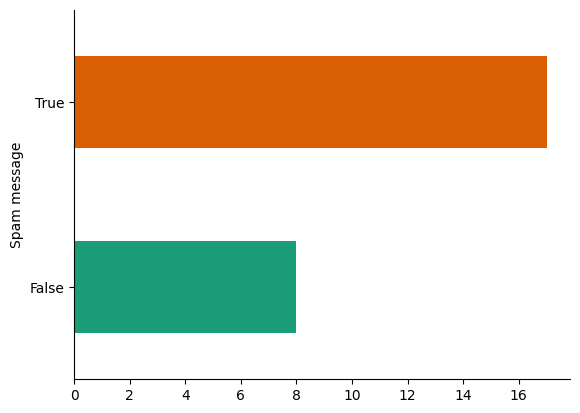

In [15]:
df.groupby('Spam message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)